In [5]:
import pandas as pd
import numpy as np
import os, random, math, datetime
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [2]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'
path_params = '../../share/parameters/fruitmodel/cogshall.toml'

In [3]:
df_input_hourly, df_input_daily, df_sunlit, params = initialize_input(path_hourly, path_daily, path_sunlit, path_params)

In [6]:
bloom_date = np.datetime64(datetime.datetime.strptime('01/11/2002', '%d/%m/%Y'), 'D')
nb_fruits = 1
nb_leaves_treatments = [5, 10, 25, 50, 100, 150]

DM_fruit_0 = 0.97 * np.random.normal(13.9, 4.1) + 0.03 * np.random.normal(29.2, 0.66)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

In [7]:
dfs = []
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(
            bloom_date,
            nb_fruits,
            nb_leaves,
            sunlit_bs,
            df_input_daily,
            df_input_hourly,
            params,
            DM_fruit_0,
            DM_fruit_ini=np.nan,
            sim_date_ini=None,
            dd_thresh=np.nan,
            stop_sim_ddcum=np.nan,
            verbose=False
        )
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
    finally:
        dfs.append(df)
        if df is not None:
            display(df.head())


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-12-13,135.910339,16.925001,106.614857,13.968139,95.505589,11.490191,0.119910,2.615529,-0.414445,...,0.001814,0.005324,0.007711,0.014849,0.013097,0.020772,356.90,5.0,0.486537,42.0
1,2002-12-14,145.744086,17.025020,116.463862,14.049333,104.328328,11.556982,0.117967,2.572635,-0.406992,...,0.001955,0.004887,0.007256,0.014098,0.012453,0.019140,367.50,5.0,0.486537,43.0
2,2002-12-15,154.134102,17.153464,123.872815,14.153604,110.965268,11.642755,0.116056,2.530444,-0.336434,...,0.002095,0.004600,0.006991,0.013686,0.012139,0.018093,377.40,5.0,0.486537,44.0
3,2002-12-16,164.339275,17.267147,132.919215,14.245892,119.069033,11.718671,0.114176,2.488944,-0.319043,...,0.002191,0.004293,0.006671,0.013156,0.011700,0.016951,386.90,5.0,0.486537,45.0
4,2002-12-17,172.847182,17.423608,140.410992,14.372908,125.780167,11.823154,0.112326,2.448126,-0.318644,...,0.002303,0.004070,0.006468,0.012840,0.011482,0.016139,396.55,5.0,0.486537,46.0


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-12-13,135.910339,16.925001,106.614857,13.968139,95.505589,11.490191,0.239819,2.615529,-0.413393,...,0.001814,0.005324,0.007711,0.014849,0.013097,0.020772,356.90,10.0,0.486537,42
1,2002-12-14,145.868509,17.225973,116.412149,14.212468,104.282003,11.691176,0.235934,2.572635,-0.408906,...,0.001923,0.004930,0.007320,0.014173,0.012746,0.019356,367.50,10.0,0.486537,43
2,2002-12-15,154.589050,17.591322,123.924761,14.509062,111.011801,11.935155,0.232112,2.530444,-0.341213,...,0.002032,0.004682,0.007116,0.013831,0.012735,0.018512,377.40,10.0,0.486537,44
3,2002-12-16,165.296685,17.917411,133.248676,14.773787,119.364164,12.152917,0.228352,2.488944,-0.325213,...,0.002109,0.004399,0.006837,0.013345,0.012518,0.017503,386.90,10.0,0.486537,45
4,2002-12-17,174.458357,18.324895,141.122100,15.104601,126.417177,12.425045,0.224652,2.448126,-0.326342,...,0.002201,0.004201,0.006678,0.013080,0.012554,0.016836,396.55,10.0,0.486537,46


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-12-13,135.910339,16.925001,106.614857,13.968139,95.505589,11.490191,0.599548,2.615529,-0.410596,...,0.001814,0.005324,0.007711,0.014849,0.013097,0.020772,356.90,25.0,0.486537,42
1,2002-12-14,146.199213,17.760066,116.274699,14.646061,104.158875,12.047850,0.589835,2.572635,-0.413744,...,0.001833,0.005043,0.007488,0.014364,0.013540,0.019927,367.50,25.0,0.486537,43
2,2002-12-15,155.822946,18.797383,124.050543,15.488228,111.124476,12.740617,0.580280,2.530444,-0.354096,...,0.001835,0.004901,0.007451,0.014187,0.014443,0.019659,377.40,25.0,0.486537,44
3,2002-12-16,167.915056,19.721860,134.128368,16.238836,120.152192,13.358066,0.570879,2.488944,-0.341718,...,0.001831,0.004677,0.007273,0.013781,0.014912,0.019014,386.90,25.0,0.486537,45
4,2002-12-17,178.873317,20.832888,143.039231,17.141047,128.134543,14.100225,0.561631,2.448126,-0.346494,...,0.001829,0.004537,0.007219,0.013585,0.015744,0.018733,396.55,25.0,0.486537,46


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-12-13,135.910339,16.925001,106.614857,13.968139,95.505589,11.490191,1.199096,2.615529,-0.408536,...,0.001814,0.005324,0.007711,0.014849,0.013097,0.020772,356.90,50.0,0.486537,42
1,2002-12-14,146.442846,18.153512,116.173439,14.965493,104.068167,12.310615,1.179671,2.572635,-0.417624,...,0.001760,0.005125,0.007610,0.014495,0.014139,0.020347,367.50,50.0,0.486537,43
2,2002-12-15,156.685183,19.613361,124.160112,16.150789,111.222628,13.285639,1.160560,2.530444,-0.362406,...,0.001681,0.005042,0.007667,0.014390,0.015649,0.020426,377.40,50.0,0.486537,44
3,2002-12-16,169.715111,20.963821,134.731733,17.247412,120.692687,14.187721,1.141759,2.488944,-0.352753,...,0.001597,0.004855,0.007552,0.014004,0.016660,0.020036,386.90,50.0,0.486537,45
4,2002-12-17,181.850485,22.501309,144.350090,18.496230,129.308811,15.214999,1.123262,2.448126,-0.358646,...,0.001512,0.004736,0.007540,0.013787,0.018018,0.019953,396.55,50.0,0.486537,46


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-12-13,135.910339,16.925001,106.614857,13.968139,95.505589,11.490191,2.398192,2.615529,-0.407466,...,0.001814,0.005324,0.007711,0.014849,0.013097,0.020772,356.90,100.0,0.486537,42
1,2002-12-14,146.569343,18.357783,116.120864,15.131346,104.021070,12.447046,2.359341,2.601630,-0.419721,...,0.001721,0.005167,0.007673,0.014561,0.014454,0.020565,367.50,100.0,0.486537,43
2,2002-12-15,157.120109,20.017401,124.221479,16.478897,111.277601,13.555540,2.321120,2.599030,-0.365999,...,0.001598,0.005110,0.007770,0.014478,0.016261,0.020803,377.40,100.0,0.486537,44
3,2002-12-16,170.669283,21.672233,135.010786,17.822816,120.942662,14.661049,2.283518,2.567517,-0.359467,...,0.001449,0.004954,0.007707,0.014110,0.017700,0.020620,386.90,100.0,0.486537,45
4,2002-12-17,183.415664,23.354894,145.058217,19.189714,129.943151,15.785459,2.280153,2.567517,-0.365090,...,0.001329,0.004830,0.007691,0.013849,0.019223,0.020560,396.55,100.0,0.486537,46


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-12-13,135.910339,16.925001,106.614857,13.968139,95.505589,11.490191,3.597288,2.615529,-0.407466,...,0.001814,0.005324,0.007711,0.014849,0.013097,0.020772,356.90,150.0,0.486537,42
1,2002-12-14,146.569343,18.357783,116.120864,15.131346,104.021070,12.447046,3.539012,2.614061,-0.419721,...,0.001721,0.005167,0.007673,0.014561,0.014454,0.020565,367.50,150.0,0.486537,43
2,2002-12-15,157.120109,20.017401,124.221479,16.478897,111.277601,13.555540,3.500307,2.614061,-0.365999,...,0.001598,0.005110,0.007770,0.014478,0.016261,0.020803,377.40,150.0,0.486537,44
3,2002-12-16,170.669283,21.672233,135.010786,17.822816,120.942662,14.661049,3.445875,2.614061,-0.359467,...,0.001449,0.004954,0.007707,0.014110,0.017700,0.020620,386.90,150.0,0.486537,45
4,2002-12-17,183.415664,23.354894,145.058217,19.189714,129.943151,15.785459,3.449679,2.614061,-0.365090,...,0.001329,0.004830,0.007691,0.013849,0.019223,0.020560,396.55,150.0,0.486537,46


### Lechaudel 2007, p. 226, fruit fresh matter vs days after bloom

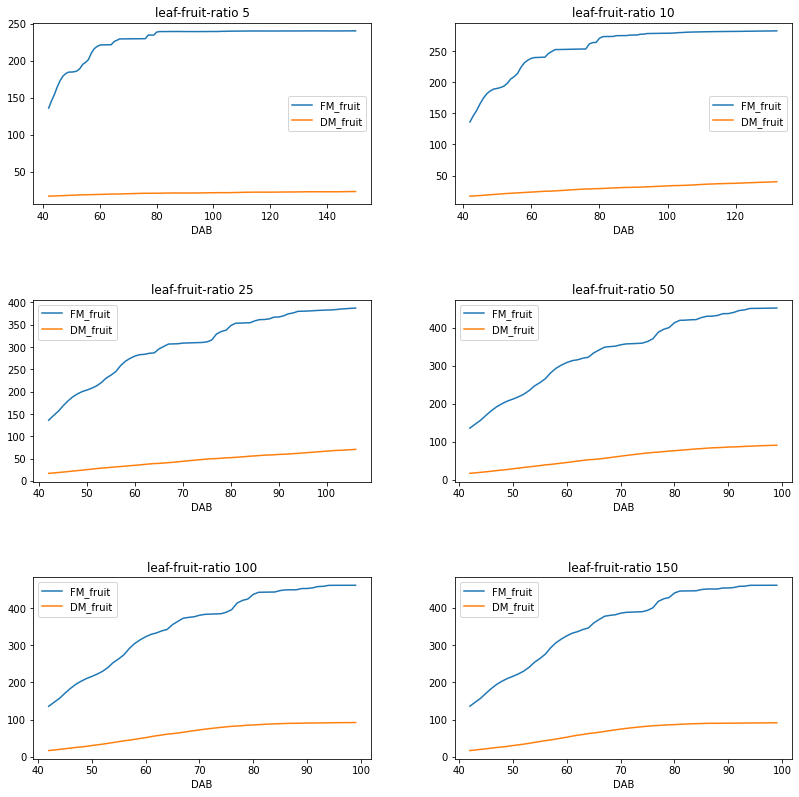

In [8]:
fig_1, axs_1 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_1 = axs_1.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'FM_fruit', 'DM_fruit']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_1[i], figsize=(12,12))

### Lechaudel 2005, p. 589, stem and leaf reserves vs days after bloom

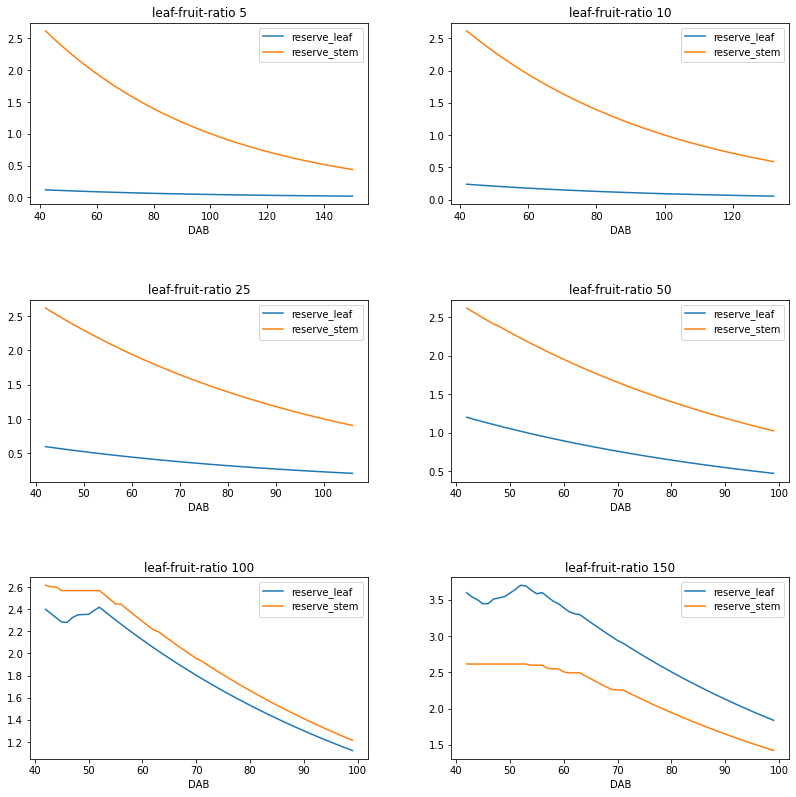

In [9]:
fig_2, axs_2 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_2 = axs_2.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'reserve_leaf', 'reserve_stem']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_2[i], figsize=(12,12))

### Lechaudel 2005, p. 590, fruit dry matter vs degree days

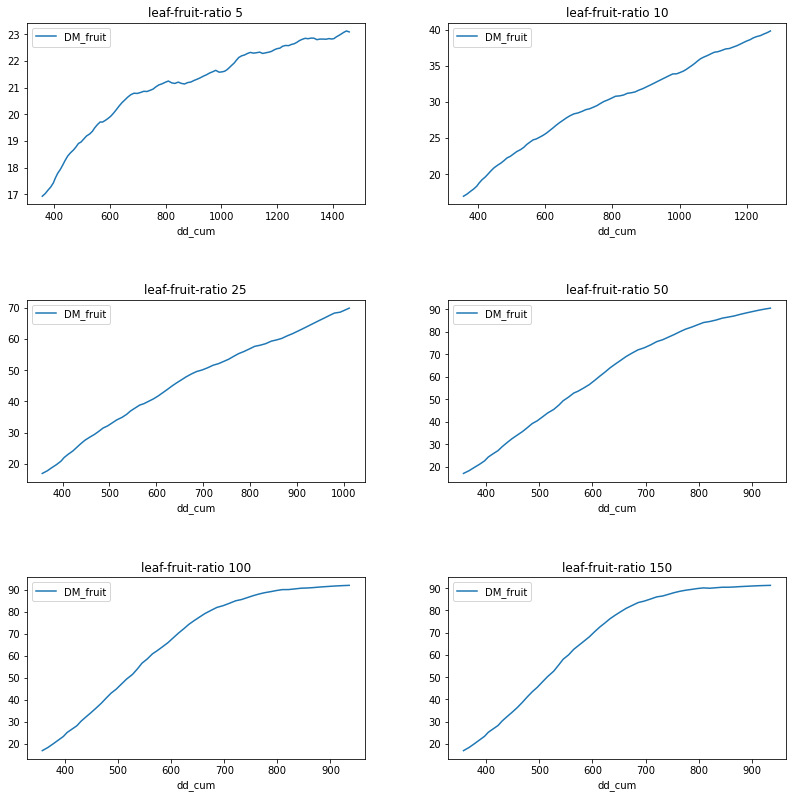

In [10]:
fig_3, axs_3 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_3 = axs_3.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['dd_cum', 'DM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_3[i], figsize=(12,12))